In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd

# <font color = 'red'> ЛР 2. Дифференцирование функций многих переменных. Линейная регрессия по произвольному базису. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 10.09.2024

Срок выполнения: 2 недели.

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Дифференцирование функции векторного аргумента. База.  </font>

Вспоминаем понятие дифференцирования.

Пусть, для начала, $f$ - функция одного аргумента, возвращающая один аргумент. Иными словами, $f:\mathbb{R} \rightarrow \mathbb{R}$.

Говорят, что $f$ **дифференцируема** в точке $x_{0}$, если существует конечный предел: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

Его называют производной функции в точке $x_{0}$.  Это жу информацию можно записать в дифференциальной форме:  $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0}}](h) + o(h)$$.Величину $f'(x_{0}) h = [Df_{x_{0}}](h)$ называют **дифференциалом функции**.


Теперь предположим, что функция $f$ работает несколько иначе. Теперь она принимает на вход векторный аргумент, а возвращает всё ещё скалярный $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Теперь понятие дифференциала вводят несколько иначе. Мы всё также можем записать: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Или же в более сжатой форме: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f)\cdot\overline{h} + o(||\overline{h}||) $$

Под производной в этом случае понимают **вектор** (чаще его пищут в виде вектор-столбца) градиента $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

В МО мы вынуждены работать с задачами оптимизации как раз таких функций, что немедленно отсылает нас к производным. В частности, используя лекционные записи, вы легко можете получить две несложных формулы матричного дифференцирования.

1. Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2.  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.


В будущем, возможно, мы дополним список. А пока можете поупражняться [самостоятельно](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Теперь проверим справедливость формулы 2.

In [2]:
A = np.random.randint(10,size =(10,10))
A

array([[7, 4, 6, 1, 7, 3, 9, 7, 6, 6],
       [5, 1, 7, 7, 2, 2, 6, 7, 4, 2],
       [7, 3, 3, 8, 9, 6, 7, 7, 2, 0],
       [5, 4, 0, 7, 2, 3, 0, 8, 3, 9],
       [9, 3, 4, 0, 8, 2, 0, 6, 7, 4],
       [8, 7, 7, 7, 2, 6, 1, 7, 7, 6],
       [4, 2, 0, 7, 6, 4, 9, 0, 8, 7],
       [2, 1, 0, 2, 0, 0, 6, 4, 2, 5],
       [4, 7, 9, 2, 0, 5, 1, 9, 8, 1],
       [7, 1, 3, 2, 2, 2, 4, 5, 3, 9]])

In [3]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) #задаём вектор-функцию согласно формуле 2

In [4]:
x0 = np.arange(0,10) # конкретные значения x0
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
grad = nd.Gradient(func)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([510., 339., 369., 378., 309., 388., 413., 381., 431., 436.])

In [6]:
np.dot(A + A.T,x0) # а теперь по нашей формуле. Всё сходится.

array([510, 339, 369, 378, 309, 388, 413, 381, 431, 436])

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите подробно формулы полученные выше. Попрактикуйтесь самостоятельно в их выводе.
2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.
3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

## <font color = 'green'> 2. Линейная регрессия по произвольному базису. </font>

Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{X}) = x_{i}$. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{j} x_{j} $$

Тут $m = k + 1 $

Обратите внимание, что формула парной регресии $f(x) = a x +b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}), $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
   \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
\end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
w_{1}\\
w_{2}\\
...\\
w_{m}
\end{bmatrix},
$$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
y_{1}\\
y_{2}\\
...\\
y_{n}
\end{bmatrix}.
$$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1.$$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

In [7]:
np.array([lambda x:1,lambda x: x])

array([<function <lambda> at 0x0000024BDF444790>,
       <function <lambda> at 0x0000024BDF444700>], dtype=object)

<font color = 'orange' size = 3>Пример 1 </font>

Для начала используем встроенные возможности.

In [31]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

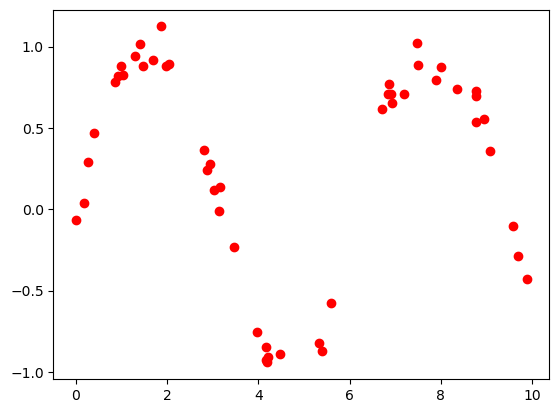

In [9]:
plt.scatter(x, y, c ='red')

In [10]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [12]:
X

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00],
       [9.23385948e-01],
       [1.86260211e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [5.38816734e+00],
       [4.19194514e+00],
       [6.85219500e+00],
       [2.04452250e+00],
       [8.78117436e+00],
       [2.73875932e-01],
       [6.70467510e+00],
       [4.17304802e+00],
       [5.58689828e+00],
       [1.40386939e+00],
       [1.98101489e+00],
       [8.00744569e+00],
       [9.68261576e+00],
       [3.13424178e+00],
       [6.92322616e+00],
       [8.76389152e+00],
       [8.94606664e+00],
       [8.50442114e-01],
       [3.90547832e-01],
       [1.69830420e+00],
       [8.78142503e+00],
       [9.83468338e-01],
       [4.21107625e+00],
       [9.57889530e+00],
       [5.33165285e+00],
       [6.91877114e+00],
       [3.15515631e+00],
       [6.86500928e+00],
       [8.34625672e+00],
       [1.82882773e-01],
       [7.50144315e+00],


In [13]:
model.fit(X, y)

LinearRegression()

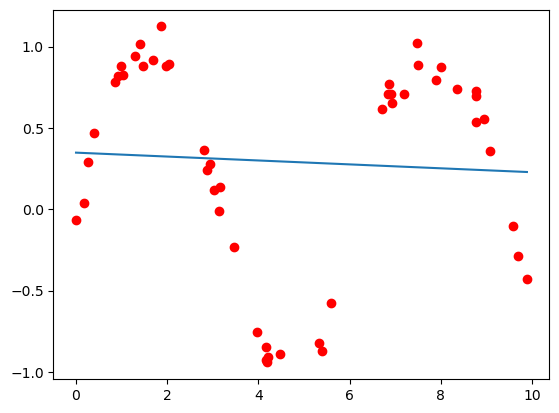

In [14]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [15]:
model.score(X,y)# позорище, а не модель

0.003269744706462907

In [16]:
(model.coef_,model.intercept_)

(array([-0.01203828]), 0.34794576296220453)

А теперь добавим другой базис. Видно, что функция похожа на степенную. Используем полиномиальный базис.
Класс [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) позволяет преобразовать ваши данные  и перейти от стандартного базиса ${x_1,x_2,...x_n}$ полиномиальному базису, который состоит из всех возможных функций $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [22]:
X_new = poly_reg.fit_transform(X)
X_new[0]

array([  1.        ,   4.17022005,  17.39073524,  72.52319273,
       302.43767221])

In [19]:
class LinearRegression:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def get_w(self,bazis: np.array):
        pass
        
    def getQ(self):
        return np.fromfunction(lambda i,j: self.bazis[i](*self.x[j]),(self.bazis.size,self.x.size),dtype= 'float64')

In [21]:
model = LinearRegression(fit_intercept=False)
model

TypeError: __init__() got an unexpected keyword argument 'fit_intercept'

In [ ]:
bazis = [lambda x,i=i:pow(x,i) for i in range(5)]

In [ ]:
(bazis[0])(3)

In [ ]:
n = 5
bazis=np.array([lambda x,n=n: np.cos(n*x) for n in range(n)]+ [lambda x,n=n: np.sin(n*x) for n in range(n)])

In [ ]:
model.fit(X_new, y)

In [ ]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [ ]:
model.score(X_new,y)# уже лучше!

In [ ]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

**Упражнение** Подумайте, за что отвечает параметр fit_intercept и почему первый коэффициент равен 0

<font color = 'orange' size = 3>Пример 2 </font>

Теперь возьмём многомерные фичи. Используем рыбный датасет из файла Fish.csv и попробуем создать модель регрессии для предсказания веса (столбец weight).

Попробуем использовать стандартную формулу для классической регрессии $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.


In [ ]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

In [ ]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [ ]:
X

In [ ]:
y = dataframe["Weight"].values # вес будем предсказывать

In [ ]:
y

In [ ]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

In [ ]:
model.fit(X, y)

In [ ]:
model.score(X,y)

In [ ]:
(model.coef_,model.intercept_)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите подробно описанные выше примеры.
2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!
3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.
4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.
5. Попытайтесь предсказать [Perfomance index](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) студентов и [Цену дома (Med house val)](https://www.kaggle.com/datasets/shibumohapatra/house-price/data) используя вашу собственную и встроенные модели с различными базисами. 
6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.
7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.
8. Попробуйте на тестовых или реальных данных повышать сложность модели. Например добавляя фичи всё большей и большей степени. Как это влияет на точность на обучющих и тестовых данных??


Указание! Для оценки качества модели, в случае, если рисунок не возможен используйте [коэффициент детерминации](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} -f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

где $\overline{y}$ - столбец обучающих меток, $f(\overline{x})$ - функция предсказания применённая к вектор столбцу исходных признаков. 

to be continued... 🧡

In [27]:
np.tile(np.linspace(-2,2,),(10,1))

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [42]:
def gausian_bazis(x):
    n = x.shape[1]
    centres = np.tile(np.linspace(-5,5,n),(n,1)).transpose()
    sigma = 0.5
    def gaussian_basis(x, mu, sigma):
        return np.exp(-0.5 * np.sum(((x - mu) / sigma) ** 2, axis=1))
    
    Phi = np.ones((n, m + 1))
    for j in range(m):
        Phi[:, j + 1] = gaussian_basis(x, centers[j], sigma)
    return Phi

    

In [43]:
x = x.reshape(-1,1)

In [44]:
gausian_bazis(x)

ValueError: could not broadcast input array from shape (50,) into shape (1,)

In [52]:
import numpy as np

# Пример данных
n = 100  # число наблюдений
d = 5    # размерность входного вектора

X_input = np.random.uniform(-3, 3, (n, d))

centers = np.array([
    [-2, -2,-2,-2, -2,],
    [-1, -1,-1, -1,-1],
    [0, 0,0, 0,0],
    [1, 1,1, 1,1],
    [2, 2,2, 2,2]
])
sigma = 0.5

# Функция для вычисления многомерных Гауссовых базисных функций
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * np.sum(((x - mu) / sigma) ** 2, axis=1))

# Построение матрицы признаков
Phi = np.ones((n, d + 1))
for j in range(d):
    Phi[:, j + 1] = gaussian_basis(X_input, centers[j], sigma)
